In [108]:
#read the csv file grad_norms.csv and plot the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [109]:
num_tasks = 20
task_len = 237
it_per_batch = 3
discard_first_n = 3
total_length = task_len*num_tasks*it_per_batch-discard_first_n

#read the csv file
df = pd.read_csv('grad_data_no_transform.csv')
df = df.head(total_length)

df['grad_diff'] = df['New_data_Grad_Norm']-df['Buffer_data_Grad_Norm']

df['new_task'] = np.zeros(total_length)
for i in range(1, num_tasks):
    df.loc[i*task_len*it_per_batch-discard_first_n, 'new_task'] = 1




In [110]:
#plot the data with plotly. Put a vertical dashed line every 711 steps (strating counting from -2). Put a vertical dotted line every 237 steps (strating counting from -2)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['grad_diff'], mode='lines', name='grad_diff'))
fig.update_layout(title='Grad Norm difference new data - old data', xaxis_title='step', yaxis_title='grad_diff')

#add a vertical line where new_task is 1
for i in range(len(df)):
    if df.loc[i, 'new_task'] == 1:
        fig.add_shape(
            type="line", x0=i, y0=df['grad_diff'].min(), x1=i, y1=df['grad_diff'].max(),
            line=dict(width=1, dash="dash")
        )

fig.show()


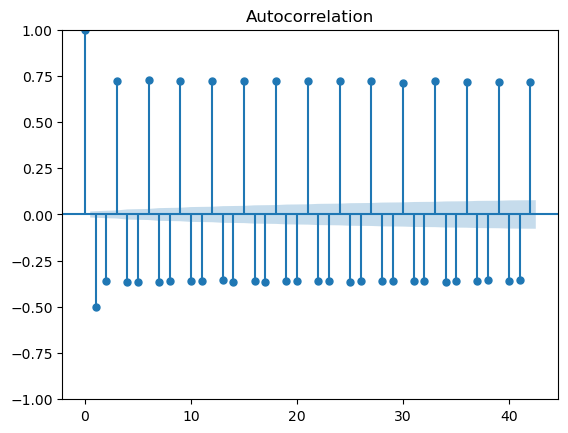

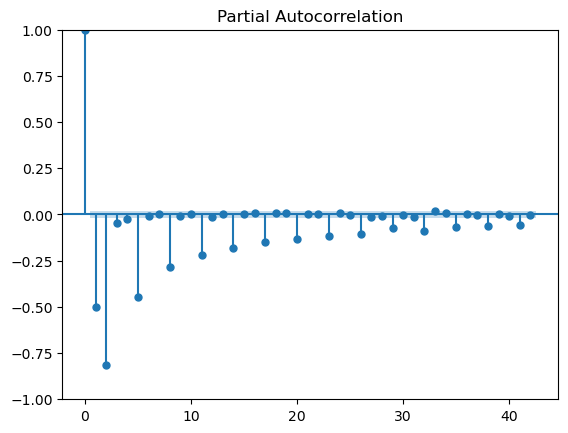

In [112]:
#compute and plot the acf and pacf of the first difference of the difference
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.grad_diff.diff().dropna())
plt.show()
plot_pacf(df.grad_diff.diff().dropna())
plt.show()


In [117]:
#Plot with plotly the first both Buffer_data_Grad_Norm and New_data_Grad_Norm
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Buffer_data_Grad_Norm'], mode='lines', name='Buffer_data_Grad_Norm'))
fig.add_trace(go.Scatter(x=df.index, y=df['New_data_Grad_Norm'], mode='lines', name='New_data_Grad_Norm'))
fig.update_layout(title='Buffer_data_Grad_Norm and New_data_Grad_Norm', xaxis_title='step', yaxis_title='grad_norm')

#add a vertical line where new_task is 1
for i in range(len(df)):
    if df.loc[i, 'new_task'] == 1:
        fig.add_shape(
            type="line", x0=i, y0=df['Buffer_data_Grad_Norm'].min(), x1=i, y1=df['Buffer_data_Grad_Norm'].max(),
            line=dict(width=1, dash="dash")
        )
fig.show()

#save fig as html
fig.write_html("grad_norms.html")







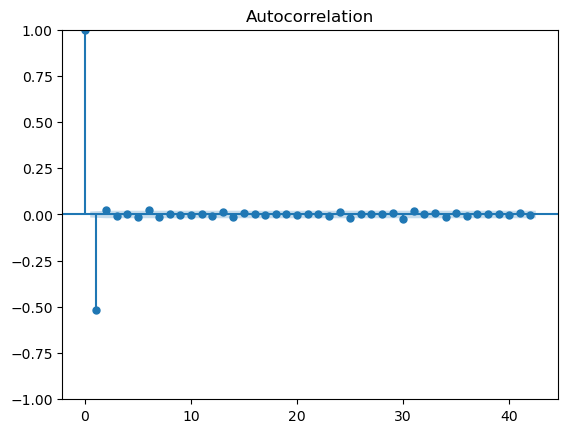

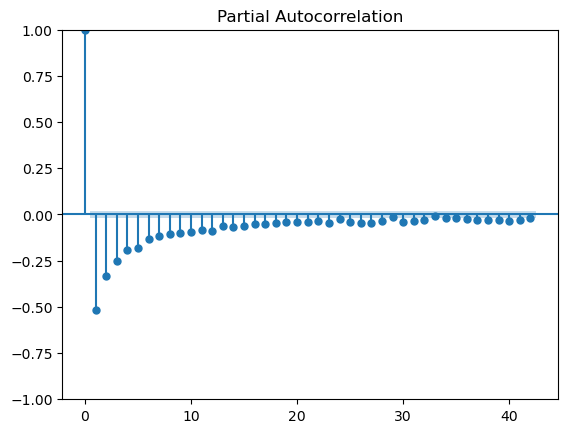

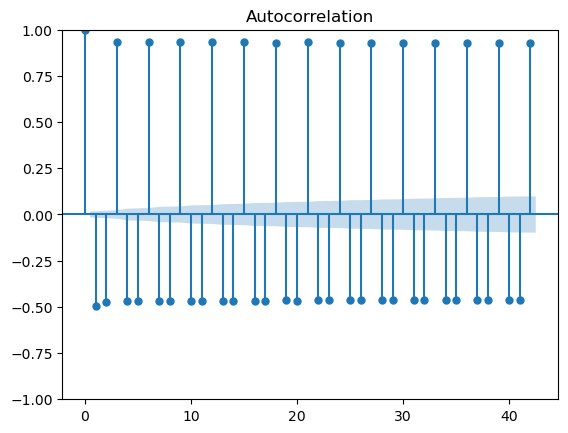

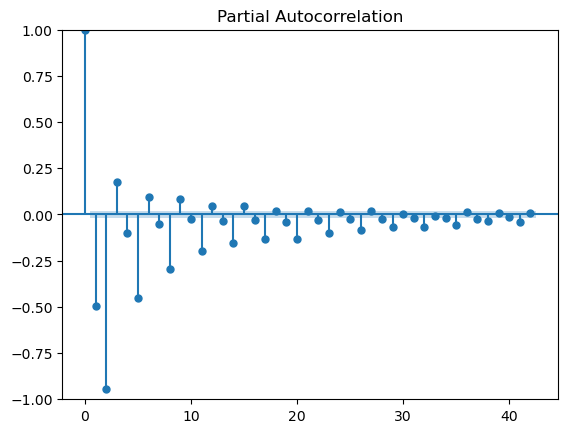

In [114]:
#plot acf and pacf of the Buffer_data_Grad_Norm and New_data_Grad_Norm
plot_acf(df.Buffer_data_Grad_Norm.diff().dropna())
plt.show()
plot_pacf(df.Buffer_data_Grad_Norm.diff().dropna())
plt.show()

plot_acf(df.New_data_Grad_Norm.diff().dropna())
plt.show()
plot_pacf(df.New_data_Grad_Norm.diff().dropna())
plt.show()


In [115]:
#plot df.Cosine_Similarity
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Cosine_Similarity'], mode='lines', name='Cosine_Similarity'))
fig.update_layout(title='Cosine_Similarity', xaxis_title='step', yaxis_title='Cosine_Similarity')

#add a vertical line where new_task is 1
for i in range(len(df)):
    if df.loc[i, 'new_task'] == 1:
        fig.add_shape(
            type="line", x0=i, y0=df['Cosine_Similarity'].min(), x1=i, y1=df['Cosine_Similarity'].max(),
            line=dict(width=1, dash="dash")
        )
        
#Add to the plot the 10 periods moving average
fig.add_trace(go.Scatter(x=df.index, y=df['Cosine_Similarity'].rolling(window=100).mean(), mode='lines', name='100 periods moving average'))


fig.show()


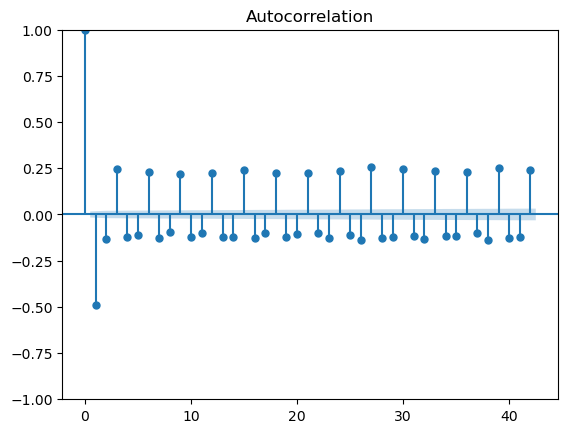

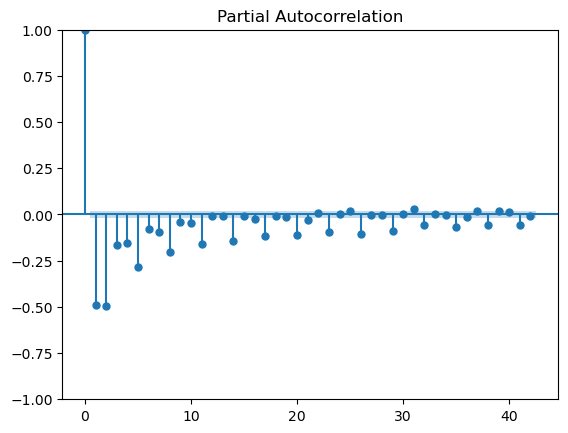

In [116]:
#the the acf and pacf of the Cosine_Similarity
plot_acf(df['Cosine_Similarity'].diff().dropna())
plt.show()
plot_pacf(df['Cosine_Similarity'].diff().dropna())
plt.show()

